In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.optimizers import SGD, Adam

Load Data and Pre-processing

In [2]:
x_train = pd.read_csv('../input/digit-recognizer/train.csv')
x_val = pd.read_csv('../input/digit-recognizer/test.csv')

y_train = x_train.iloc[:,0]
x_train = x_train.iloc[:,1:]
x_val = x_val.iloc[:,:]

In [3]:
x_train = np.asarray(x_train)/255.
y_train = np.asarray(y_train)
x_val = np.asarray(x_val)/255.

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)

(37800, 784)
(37800,)
(4200, 784)
(4200,)
(28000, 784)


View Data

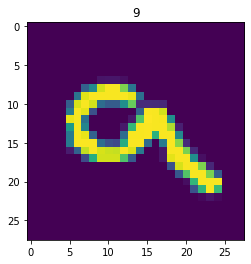

In [4]:
num = int(np.random.rand() * (len(x_train)))
plt.imshow(x_train[num].reshape(28,28))
y_ = y_train[num]
plt.title(y_)
plt.show()

In [5]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_val = np.reshape(x_val, (len(x_val), 28, 28, 1))

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

print(x_train.shape)
print(x_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


Model

In [6]:
model = Sequential()

# CONV1 Y MAX-POOLING1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# CONV2 Y MAX-POOLING2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# CONV3 Y MAX-POOLING3
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Aplanar, FC1, FC2 y salida
model.add(Flatten())
model.add(Dense(96,activation='relu'))
model.add(Dense(96,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [8]:
sgd = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

nepochs = 30
tam_lote = 32
history = model.fit(x_train, y_train, epochs=nepochs, batch_size=tam_lote, verbose=1, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/30
1182/1182 [==============================] - 11s 4ms/step - loss: 1.8710 - accuracy: 0.4577 - val_loss: 0.3216 - val_accuracy: 0.9033
Epoch 2/30
1182/1182 [==============================] - 4s 4ms/step - loss: 0.2688 - accuracy: 0.9159 - val_loss: 0.2402 - val_accuracy: 0.9238
Epoch 3/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.1637 - accuracy: 0.9475 - val_loss: 0.1285 - val_accuracy: 0.9602
Epoch 4/30
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1268 - accuracy: 0.9611 - val_loss: 0.4194 - val_accuracy: 0.8700
Epoch 5/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.1081 - accuracy: 0.9650 - val_loss: 0.1003 - val_accuracy: 0.9681
Epoch 6/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0893 - accuracy: 0.9728 - val_loss: 0.0971 - val_accuracy: 0.9693
Epoch 7/30
1182/1182 [==============================] - 4s 3ms/step - loss: 0.0794 - accuracy: 0.9757 - val_loss: 0.0830 - val_accuracy

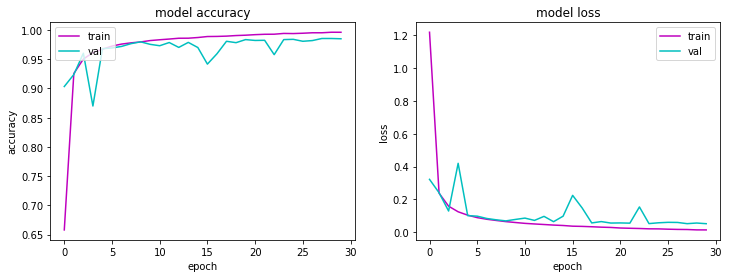

In [9]:
plt.subplots(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['accuracy'], c='m')
plt.plot(history.history['val_accuracy'], c='c')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'], c='m')
plt.plot(history.history['val_loss'], c='c')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Predict: test data and validation data

In [10]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)

y_val = model.predict(x_val)
y_pred_val_class = np.argmax(y_val, axis=1)

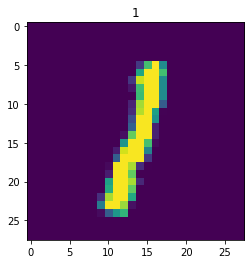

In [11]:
# test data
num = int(np.random.rand() * (len(x_test)))
plt.imshow(x_test[num])
title = y_pred_class[num]
plt.title(title)
plt.show()

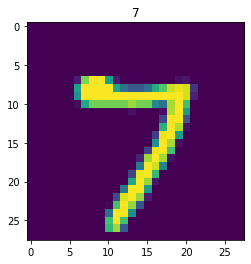

In [12]:
# Val data
num = int(np.random.rand() * (len(x_val)))
plt.imshow(x_val[num])
title = y_pred_val_class[num]
plt.title(title)
plt.show()

In [13]:
model.evaluate(x_val, y_val)

875/875 [==============================] - 2s 2ms/step - loss: 0.0264 - accuracy: 1.0000


[0.026441944763064384, 1.0]

In [14]:
# Confusion matrix
y_test = np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred_class)

array([[407,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 469,   1,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0, 409,   3,   2,   0,   0,   5,   1,   0],
       [  0,   0,   1, 498,   0,   3,   0,   2,   2,   0],
       [  1,   0,   0,   0, 390,   0,   1,   1,   1,   3],
       [  0,   0,   0,   1,   0, 336,   0,   0,   1,   1],
       [  2,   1,   2,   0,   0,   0, 397,   0,   0,   0],
       [  0,   0,   2,   3,   1,   0,   0, 430,   1,   1],
       [  0,   0,   0,   1,   3,   2,   0,   1, 396,   0],
       [  2,   0,   1,   1,   1,   3,   0,   1,   2, 405]])

Submission

In [15]:
sample = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
image_id = range(1, y_pred_val_class.shape[0] + 1)

submission = pd.DataFrame({'ImageId': image_id, 'Label': y_pred_val_class})
submission.to_csv('submission', index=False)